In [17]:
import numpy as np
from matplotlib import pyplot as plt

try:
    from jupyterthemes import jtplot
    # currently installed theme will be used to
    # set plot style if no arguments provided
    jtplot.style()
except:
    print("Jupyter themes have not been installed")
    print("This notebook was formated for Jupyter Dark Theme")
    print("Optional: Download and setup Jupyter Themes from https://github.com/dunovank/jupyter-themes")
    
%matplotlib inline

$\newcommand{\Pr}{\text{Pr}}$

# Review of  Probability Mass Functions
- @Author: Kai Bernardini
- Designed as supplementary material for CS237, Boston University

## **Formal Definition: **
- Let $$X:\Omega \rightarrow A\subset \mathbb{R}$$ be a discrete random variable. Then the **Probability Mass Function**  or **PMF** is defined as 
$$f_X(x): A\to [0,1]$$
$$f_X(x) = \Pr[X=x] = \Pr(\{s \in \Omega : X(s) = x \} )$$
where $$\sum_{x\in A}f_X(x) = 1 $$

## **Informal and In plain English:** 
Personally, I find the rigorous definition to be straight forward, but it always helps supplement the formal definition with an intuitive understanding and to have an example in mind. Think of the probability mass function (PMF) as an oracle of sorts. The Greeks would visit an oracle and ask for the answer to  a particular question.
- I.E., they could ask the oracle whether or not it will rain tomorrow. The answer could be 
- "Yes" implying the probability of rain tomorrow is 1 (the event is certain)
- "No" implying the probability of rain tomorrow is 0 (the event is impossible)
- "Maybe" implying the probability of rain tomorrow is in $(0,1)$ 

In the case of a PMF, you *ask* the PMF what the probability of a particular event is, *and it tells you*. Under this analogy, the "question" is the input to the PMF and the "answer" is the output of the function on the input.  
## More formally...
Lets make this example more precise. Suppose we  want to know whether or not it will rain tomorrow. In this example, the sample space is composed of 2 outcomes: namely, it will either rain, or it won't rain.   Then $\Omega := \{\text{no rain}, \text{rain} \}$. Let $X$ be the random variable  $$X: \Omega \to \{0,1\} \subset \mathbb{R}$$  defined by  $$X(s) = \begin{cases}1 & \text{ if } s = \text{rain}\\ 0 & \text{ otherwise} \end{cases}$$ 
Again, keep in mind that all this notation does in this case is associate "rain" to 1 and "no rain" to 0.  Then if we, for example, were interested in the probability that it will rain tomorrow, we would ask the oracle "What is the probability of it raining tomorrow?" which is mathematically equivalent to writing 
$$\Pr[\text{rain}]= \Pr[X=1]$$
and similarly, the probability of "no rain" tomorrow is exactly $$\Pr[\text{no rain}]= \Pr[X=0]$$
The function that explicitly encodes this information is the PMF defined as $$f_X:\{0,1\} \to [0,1] $$

Then using the example of the oracle, the question to the oracle "will it rain tomorrow?"  would be translated into the input "1" and the answer to the question would be $f_X(1)$. More specifically, $$ \text{"The probability of it raining tomorrow"} = f_X(1) = \Pr[X=1] = \Pr[\text{rain}]$$
- ** From this example, it is clear why we need the sum over all inputs to the PMF to sum to 1, as this if it didn't this would contradict the law of total probability. **

# Programmatic Representations of a PMF
- Lets make a simplifying assumption (that we will relax later) that the range of our random variable is ** finite ** and ** can fit into memory **. 
- Lets think about a ** data structure ** that can help us represent the probability mass function. TO make this precise, lets consider the example of rolling a fair 6 sided die. 
    - That is, when we roll the die, each one of the numbers $ \Omega = \{1,2,3,4,5,6\}$ is equally likely to show up. 
    - Since $\Pr[s \in \Omega] = c$ and $\sum_{s \in \Omega} \Pr[s] = 1 \implies c = \frac{1}{6}$
        - All that this notation means is if every event is equally likely (ie they all have the same probability, call it $c$), there are 6 events,  and the sum over all events needs to be 1, this just mens $\sum_{i=1}^6 c = c+c+...+c = 6c = 1 \implies c = \frac{1}{6}$ 
- Since each event is equally likely, the PMF is exactly $$f_X(x) = \begin{cases}\frac{1}{6} \text{ if } x\in \{1,2,3,4,5,6\} \\ 0 \text{ otherwise} \end{cases}$$
- Think about what this is doing though: it is just asosciating one of the events to a probability. I.E.
$$\begin{align*} 1 &\leftrightarrow \frac{1}{6} \\ 2 &\leftrightarrow \frac{1}{6} \\ \vdots & ~~~~~~~ \vdots \\ 6 &\leftrightarrow \frac{1}{6}   \end{align*}$$
A natural choice for a datastructure is a hash table, which has constant time lookup between key value pairs. In python, we would use a dictionary 
- In particular, the key value pairs would be $\Big(x, f_X(x) \Big)$ and if a value is not in the dictionary, we would simply return 0 (as this means the input is NOT in the range of the random variable of interest). 

## Remark on Datastructure:
Note that we don't **have to ** use a hash table, but it is the most convenient way to store unordered collections of key/value pairs, where the lookup between input and output is constant. **[add more on this...] **

In [64]:
def die_roll_pmf(x):
    """
    Probability Mass function for a Fair, 6-sided die
    Computationally, it represents inputs to the PMF as keys, and 
    the probability of the input as the value 
    {
     1: 0.16666666666666666,
     2: 0.16666666666666666,
     3: 0.16666666666666666,
     4: 0.16666666666666666,
     5: 0.16666666666666666,
     6: 0.16666666666666666
     }
     
    """
    # list comprehensions also work for dictionaries 
    pmf_dict = {i:1/6 for i in range(1,7)}
    if x in pmf_dict:
        return pmf_dict[x]
    # note this only gets executed if the above boolean statement is false
    # i.e., the input is NOT in the range
    # Technically speaking, since the PMF is only defined on the range of the RV, we don't need this step
    return 0

In [69]:
# We can also do the same thing but use exceptions 
def die_roll_pmf_alt(x):
    """
    Probability Mass function for a Fair, 6-sided die
    Computationally, it represents inputs to the PMF as keys, and 
    the probability of the input as the value 
    """
    # list comprehensions also work for dictionaries 
    pmf_dict = {i:1/6 for i in range(1,7)}
    try:
        return pmf_dict[x]
    except KeyError:
        return 0

# should print 1/6, 0
print(die_roll_pmf_alt(1),die_roll_pmf_alt(0) )

0.16666666666666666 0


# Plotting the PMF
- Lets plot the ** graph ** of the PMF for the fair die example.  
- We will draw the graph using a * line chart*
    - (we will use a bar chart with a small width)
- The $x$-axis will be the input to the PMF and the $y$-axis will be the probability of that input. 
- Note that it is not continuous, and is only non-zero in 6 places.
    - Hence, we need only plot 6 values 

Text(0.5,1,'PMF for a fair 6-sided Die')

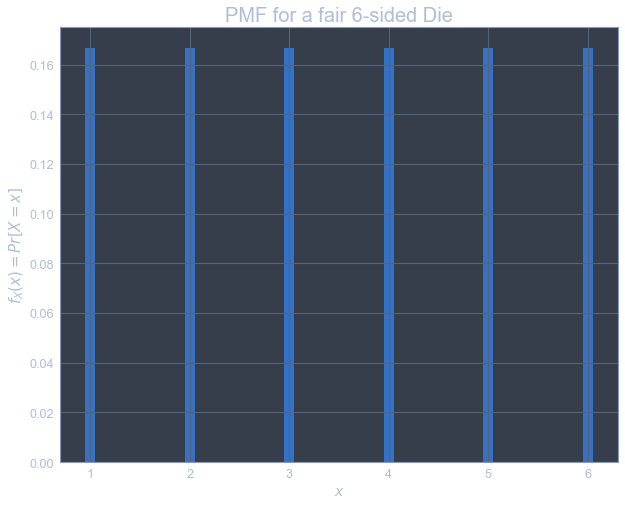

In [63]:
# This generates the x values for the bar
# Note the range is only [1,2,3,4,5,6]
die_range = [i for i in range(1,7)]

# This generates the associated probabilities 
# Note all it does is apply the die pmf to each element
probs = [die_roll_pmf(x) for x in die_range]

## Plotting the Graph ##
# Set the figure size to be 10 x 8 inches 
plt.figure(figsize=(10,8))
# Generate the bar chart where the x values are the range of the R.V.
# The height is going to be the associated probability 
# Width is set small (in this case .1)
plt.bar(x=die_range, height= probs, width = .1)

# This just sets lables for the x/y axis and title
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f_X(x)=Pr[X=x]$", fontsize=15)
plt.title("PMF for a fair 6-sided Die", fontsize=20)

# General python PMF 
- If the range of the random variable is finite, and fits into memory, we can represent the entirety of the function has a python dictionary. 
- We can either pass in the PMF as an argument, or construct a function from within the function. Both Examples are shown below 

In [42]:
def dict_pmf(x, pmf_dict):
    """
    General formulation of the dictionary PMF
    @Arguments:
    x -- real number, the input to the PMF
    pmf_dict -- dictionary of key values pairs where the key is the input x and 
    the value is $f_X(x)$ (PMF of x)
    Returns: PMF(x)
    """
    if x in pmf_dict:
        return pmf_dict[x]
    return 0

die_pmf_dict = {i:1/6 for i in range(1,7)}
dict_pmf(3, die_pmf_dict)


0.16666666666666666

In [78]:
def gen_pmf(pmf_dict):
    """
    General formulation of the dictionary PMF
    @Arguments:
    x -- real number, the input to the PMF
    pmf_dict -- dictionary of key values pairs where the key is the input x and 
    the value is $f_X(x)$ (PMF of x)
    - generates a function 
    Returns: PMF function
    """
    def tmp_pmf(x):
        if x in pmf_dict:
            return pmf_dict[x]
        return 0
    return tmp_pmf

# generates the function and gives it a name
gen_die_pmf = gen_pmf(die_pmf_dict)
# Calls the function 
gen_die_pmf(2), gen_die_pmf(0)

(0.16666666666666666, 0)

# Another Example
Suppose we have for a random variable $X$ and associated PMF $$f_X(x) = \begin{cases}\frac{1}{3} & \text{ if } x = 1\\ \frac{1}{6} & \text{ if } x = 3 \\
 \frac{1}{2} & \text{ if } x = 5 \\ 0 & \text{ otherwise}\end{cases}$$
 We could then represent this PMF using the `dict_pmf` function above with  an input `pmf_dict=example_pmf_dict = {1:1/3, 3:1/6, 5:.5}` 
 
 Note, this is a perfectly fine PMF as $$\sum_{x\in R(X)} f_X(x) = \frac{1}{3} + \frac{1}{6} + \frac{1}{2}= 1$$

Text(0.5,1,'PMF For Another Example')

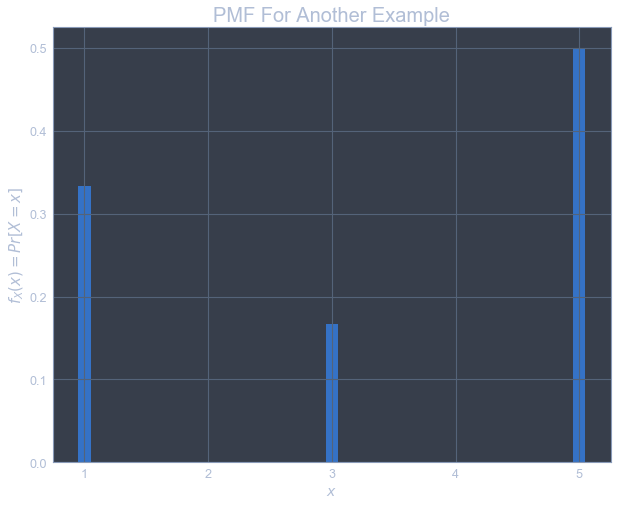

In [59]:
example_range = [1,3,5]
example_pmf_dict = {1:1/3, 3:1/6, 5:.5}

example_probs = [dict_pmf(x,example_pmf_dict) for x in example_range]
plt.figure(figsize=(10,8))
plt.bar(x=example_range, height= example_probs, width = .1)
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f_X(x)=Pr[X=x]$", fontsize=15)
plt.title("PMF For Another Example", fontsize=20)

# Sanity Check [Optional]
Try it out for yourself! Here is an example of a (relatively easy problem) you could encounter:
- Suppose you roll 2 fair, 3 sided die. Let $X$ be the random variable that takes on the *sum* of  two observed die. For example, if when we rolled the die, we observed a 3 and a 2 (denotes as (3,2) where 3 is the outcome of the first die and 2 is the outcome of the second die) then $X$ would be $3+2=5$. 
- Write down the sample space of outcomes. 
    - Feel free to leave it in terms of product sets. 
- Write down the range of $X$
- Write down the associated PMF of $X$ 
- Programmatically implement the PMF of $X$. 

In [79]:
# Your Solution here

# Instructor solution
The beauty of this class, is it is NOT a purely mathematical course! You can use tools in python to greatly simplify your work! In particular, lets use python to write down the sample space of the problem! 
- Let $D= \{1,2,3\}$. Then $\Omega = D\times D = D^2$ where $\times $ is the [Cartesian] Product of sets
- This is just all pairs $(i,j)$ with $i,j\in D$.
- If we wanted to actually generate the set, we could do it as follows:

In [82]:
# this is the set of interest
D = [1,2,3]

# This computes the set product of 2 sets
def set_product(S,T):
    prod_set = [(i,j) for i in S for j in T]
    return prod_set
# this is D^2
D2 = set_product(D,D)
D2

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

# Instructor solution continued
- Now lets find what the Range of $X$ is.  This is easy to compute analytically since all we need to do is look at the min of $D$ and the max of $D$. In particular, it is bounded below by $1+1=2$ and above by $3+3=6$. Since the values are contiguous over $\mathbb{Z}$, the range of $X$ is $\{2,3,4,5,6\}$. 
- Lets say we didn't know how to do this analytically though ( as if I gave you a harder problem, it wouldn't be so simple!)
    - Lets see how we can use python to greatly simplify the problem!
    
First, we need to transform the outcomes of $\Omega$ into outcomes of $X$. Note that in this case, 
$$X:\Omega \to \mathbb{R}$$ but $\Omega = D\times D$ meaning $$X:D \times D \to \mathbb{R}$$ defined by $$(i,j)\mapsto i + j$$ for $i,j \in D$
We can easily implement this in python as follows

In [88]:
# First, we need to look at $X$ which is the sum of the two die
X_outcomes = [sum(i) for i in D2]
X_outcomes, len(X_outcomes)

([2, 3, 4, 3, 4, 5, 4, 5, 6], 9)

# Instructor solution continued
- Now that we have the outcomes, we can easily get both the range, and the PMF! To do this, we will use the built in function `Counter` from the collections package. The counter function takes in as an input an array of values, and constructs a dictionary like object of key value pairs where the key corresponds to an object from the array, and the value is the number of times that element shows up in that array. 
- Lets see how we could get both the range and PMF below!

In [85]:
# THis imports only the Counter function from the colelctions package
from collections import Counter

# Build the counter object
dist = Counter(X_outcomes)
# Remember, the key is the object in the array, and the value is the number
# of times that number occurs
# For example, dist[2] = 1 as 
# 2 only shows up once in the array
dist[2]

1

In [87]:
# generate the range of the random variable
# .keys() gets all the keys from the Counter object
# We the sort the keys 
X_range = sorted(dist.keys())
X_range

[2, 3, 4, 5, 6]

 Recall, for $|\Omega| = n, A\subset \Omega,  |A| = m$, $$\Pr[A] = \frac{|A|}{|\Omega|} = \frac{m}{n}$$ 
 - This means to find the PMF for $X$, we  only need to normalize the counts. IE, if 2 occurs only once out of $|\Omega|=9$  outcomes, then $\Pr[X=2] = \frac{1}{9}$
 - Hence, we can just normalize each element in the Count object by dividing its input by 9. 

In [89]:
# Normalize the frequencies into proportions
sum_pmf = {i:dist[i]/9 for i in X_range }
sum_pmf

{2: 0.1111111111111111,
 3: 0.2222222222222222,
 4: 0.3333333333333333,
 5: 0.2222222222222222,
 6: 0.1111111111111111}

# Quick Remark: 
- Numerically, you may encounter a problem where summing over all values doesn't yield 1. 
- It typically suffices to check up to 8 decimal places. See below where we revisit the fair die example:

In [90]:
# Lets check that this is indeed a valid PMF: 
# Note there will likely be some numerical error, 
print("The sum over all values should be 1, but it is: {}".format(sum(probs)))

The sum over all values should be 1, but it is: 0.9999999999999999


In [91]:
# Does python know this is 1?
# NO!
print("Does this sum equal 1? {}".format(sum(probs) ==1))

# But it is close enough!
print("Is the sum accurate up to 8 decimal places? {}".format(abs(sum(probs) - 1) < 1e-8))

Does this sum equal 1? False
Is the sum accurate up to 8 decimal places? True


# What about if $X$ has a countably infinite range?
- In this section, we consider what happens if  the range of $X$ written $R(X)$ is countably infinite. 
- Suppose we have the following PMF for a random variable $X$
$$f_X(x) = \begin{cases} \Big(\frac{1}{2}\Big)^x & \text{ if } x\in \mathbb{N} \\ 0 & \text{ otherwise} \end{cases}$$
- Notice that each input is indexed by a natural number, and its probability is a function of that input
<table border="PMF(x)" class="dataframe">
  <thead>
  </thead>
  <tbody>
    <tr>
      <th>$x$</th>
      <td>1</td>
      <td>2</td>
      <td>3</td>
      <td>4</td>
      <td>5</td>
      <td>6</td>
      <td>...</td>
    </tr>
    <tr>
      <th> '$f_X(x)$' </th>
      <td>$\frac{1}{2^1}$</td>
      <td>$\frac{1}{2^2}$</td>
      <td>$\frac{1}{2^3}$</td>
      <td>$\frac{1}{2^4}$</td>
      <td>$\frac{1}{2^5}$</td>
      <td>$\frac{1}{2^6}$</td>

        <td>...</td>
    </tr>
  </tbody>
</table>
-  First, we verify that this is indeed a valid PMF by showing $$\sum_{x\in R(x)} f_X(x) = \sum_{x=1}^{\infty} \frac{1}{2^x} = \frac{1}{2} + \frac{1}{4}+ \frac{1}{8}+...=1$$
There are a few ways to show that this converges, but the geometric series test tells us it does-- and it even tells us what it converges to. If you forgot what the formula is, it is easy to work out since we know it converges. Lets call this value $c$. In particular, $$ \sum_{x=1}^{\infty} \frac{1}{2^x}  = \frac{1}{2} + \frac{1}{4}+ \frac{1}{8}+...= c$$
If we multiply both sides by 2, then $$ 2 \sum_{x=1}^{\infty} \frac{1}{2^x}  = \frac{2}{2} + \frac{2}{4}+ \frac{2}{8}+... = 1 +  \frac{1}{2} + \frac{1}{4}+ \frac{1}{8}+...=  1 + c= 2c$$
$$\implies c =1$$

- Note, this type of trick only works because we already know the series is convergent.
    - For example, if I took an obviously divergent series and pretended that it converged to a real number, say $c$,  $\sum_{i=1}^{\infty} i  = 1+2+3+4+5+...= c$ then you could show that subtracting 1 yields $$0 +1+2+3+4+... = c = c-1 \implies 0=1$$  which is obviously a problem 

- Now how can we represent the PMF programmatically? 
    - Since the function is indexed by natural numbers, we simply need to check if its a natural number
        - if it is, we just use the formula
        

In [50]:
def countable_pmf_example(x):
    """PMF for the countable example"""
    # first, we check if x is a natural number
    if x %1 == 0  and x >0:
        return .5 ** x
    # x isn't a natural number
    return 0

# Graphing the Countable Example
Note the Range of $X$ is countably infinite, and we therefore cannot display the entire graph. However, the PMF quickly decays to zero, so we need only show the first 10 or so.  You can verify this below!

In [56]:
def graph_countable_pmf(number_of_values_to_graph):
    # inputs to the pmf
    x_vals = [i for i in range(1, number_of_values_to_graph + 1)]
    # Probability values
    probs = [countable_pmf_example(x) for x in x_vals]
    
    # Plotting
    plt.figure(figsize=(10,8))
    plt.bar(x=x_vals, height= probs, width = .1)
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$f_X(x)=Pr[X=x]$", fontsize=15)
    plt.title("PMF for Countable Example", fontsize=20)

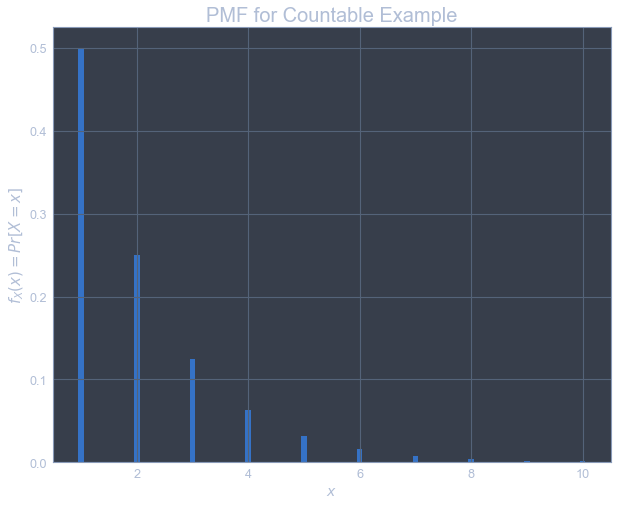

In [60]:
# 10 is a reasonable choice
# In general, graphing the meaningful portion of a PMF is a bit of an art
graph_countable_pmf(10)

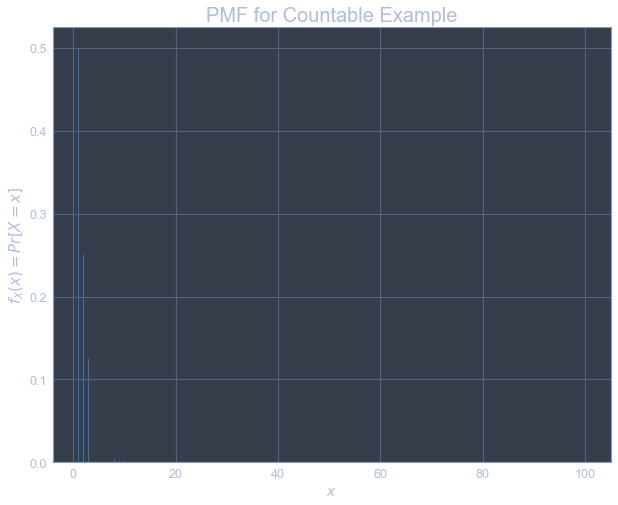

In [92]:
# What about 100? The graph is no longer very useful! 
graph_countable_pmf(100)